###WOMEN'S FASHION E-COMMERCE REVIEW
Goal : Find the highly reviewed dress and posibly obtain information on the material used, wording likened to these pieces, 

**Note: slightly biased as the market research only requires info from the highly rated pieces


In [220]:
from sklearn.feature_extraction.text import CountVectorizer
from plotly.offline import iplot #vzn
import matplotlib.pyplot as plt #vzn
from textblob import TextBlob #NLP
import cufflinks as cf #vzn
import seaborn as sns #vzn
import plotly as py #vzn
import pandas as pd
import numpy as np
import pickle
%matplotlib inline

In [19]:
#plotting - geo*
py.offline.init_notebook_mode(connected = True)
cf.go_offline()

In [2]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df.head(2)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses


In [3]:
#obtain specific columns
df_dress = df[['Clothing ID', 'Age', 'Review Text', 'Rating', 'Division Name', 'Department Name', 'Class Name']]
df_dress.head()

,Clothing ID,Age,Review Text,Rating,Division Name,Department Name,Class Name
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate,Intimates
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,Dresses
2,1077,60,I had such high hopes for this dress and reall...,3,General,Dresses,Dresses
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms,Pants
4,847,47,This shirt is very flattering to all due to th...,5,General,Tops,Blouses


In [4]:
#understand the dataset further
df_dress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 7 columns):
Clothing ID        23486 non-null int64
Age                23486 non-null int64
Review Text        22641 non-null object
Rating             23486 non-null int64
Division Name      23472 non-null object
Department Name    23472 non-null object
Class Name         23472 non-null object
dtypes: int64(3), object(4)
memory usage: 1.3+ MB


In [5]:
df_dress.describe()

,Clothing ID,Age,Rating
count,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032
std,203.298980,12.279544,1.110031
min,0.000000,18.000000,1.000000
25%,861.000000,34.000000,4.000000
50%,936.000000,41.000000,5.000000
75%,1078.000000,52.000000,5.000000
max,1205.000000,99.000000,5.000000


In [6]:
#check null values
df_dress.isnull().sum()

Clothing ID          0
Age                  0
Review Text        845
Rating               0
Division Name       14
Department Name     14
Class Name          14
dtype: int64

#In case a review text is missing, use the rating to know if it was liked

In [7]:
#unique pieces per department, class
depname = df_dress['Department Name'].unique()
print('dept :>',depname)
print('----------')
classname = df_dress['Class Name'].unique()
print('class :>',classname)
print('----------')
division = df_dress['Division Name'].unique()
print('division :>',division)

dept :> ['Intimate' 'Dresses' 'Bottoms' 'Tops' 'Jackets' 'Trend' nan]
----------
class :> ['Intimates' 'Dresses' 'Pants' 'Blouses' 'Knits' 'Outerwear' 'Lounge'
 'Sweaters' 'Skirts' 'Fine gauge' 'Sleep' 'Jackets' 'Swim' 'Trend' 'Jeans'
 'Legwear' 'Shorts' 'Layering' 'Casual bottoms' nan 'Chemises']
----------
division :> ['Initmates' 'General' 'General Petite' nan]


In [8]:
#A dress is classified as dresses within a department, and within the dressed department there could be
#other pieces such as an intimate,sweater, lounge dress and, it could also be divided into a division

In [9]:
#obtain a pure dress department info
df_dresspool = df_dress.loc[df_dress['Department Name'] == 'Dresses']
df_dresspool.head(2)

,Clothing ID,Age,Review Text,Rating,Division Name,Department Name,Class Name
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,Dresses
2,1077,60,I had such high hopes for this dress and reall...,3,General,Dresses,Dresses


In [10]:
#check unique pieces in new division, department, class
depname1 = df_dresspool['Department Name'].unique()
print('dept :>',depname1)
print('----------')
classname1 = df_dresspool['Class Name'].unique()
print('class :>',classname1)
print('----------')
division1 = df_dresspool['Division Name'].unique()
print('division :>',division1)
print('----------')
clothid = df_dresspool['Clothing ID'].unique()
print('cloth ids :', clothid)

dept :> ['Dresses']
----------
class :> ['Dresses']
----------
division :> ['General' 'General Petite']
----------
cloth ids : [1080 1077 1095 1104 1078 1081 1082 1072 1196 1094 1098 1075 1089 1103
 1086 1083 1079 1087 1110 1105 1111 1099 1076 1074 1201 1092 1197 1097
 1102 1100 1085 1084 1093   20 1090 1091 1195 1109 1088 1101 1202   13
 1199   30   17 1096 1152 1151 1107 1108 1153 1073 1200 1194   26   29
 1106 1150   23 1071 1149 1198   16 1193]


In [11]:
df_dresspool.describe()

,Clothing ID,Age,Rating
count,6319.000000,6319.000000,6319.000000
mean,1087.463206,42.114892,4.150815
std,40.372273,11.966918,1.124371
min,13.000000,18.000000,1.000000
25%,1078.000000,33.000000,4.000000
50%,1086.000000,40.000000,5.000000
75%,1095.000000,50.000000,5.000000
max,1202.000000,99.000000,5.000000


In [12]:
#null values
df_dresspool.isnull().sum()

Clothing ID          0
Age                  0
Review Text        174
Rating               0
Division Name        0
Department Name      0
Class Name           0
dtype: int64

####3 different tables for analysis. 
####sentiment analysis on the first dataframe dresspool
####check age distribution of the purchases, so far the median age is 40. Youngest buyer is 18, oldest 99, lw_quartile 33, up_quartile 50

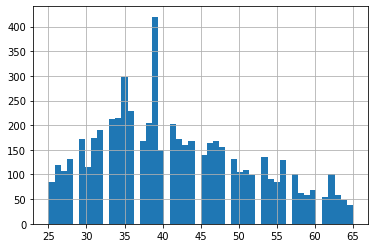

In [159]:
#age distribution
df_dresspool['Age'].hist(bins=50) #3,5,10 

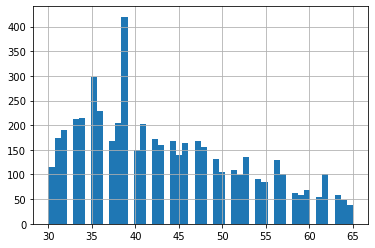

In [160]:
#use specific age group 25-60 : for targeted market reponse 
df_dresspool = df_dresspool.loc[(df_dresspool['Age'] >= 30) & (df_dresspool['Age'] <= 65)]
df_dresspool['Age'].hist(bins=50)

C:\Users\odawo\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\Users\odawo\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\Users\odawo\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcPar

Age
30    AxesSubplot(0.125,0.125;0.775x0.755)
31    AxesSubplot(0.125,0.125;0.775x0.755)
32    AxesSubplot(0.125,0.125;0.775x0.755)
33    AxesSubplot(0.125,0.125;0.775x0.755)
34    AxesSubplot(0.125,0.125;0.775x0.755)
35    AxesSubplot(0.125,0.125;0.775x0.755)
36    AxesSubplot(0.125,0.125;0.775x0.755)
37    AxesSubplot(0.125,0.125;0.775x0.755)
38    AxesSubplot(0.125,0.125;0.775x0.755)
39    AxesSubplot(0.125,0.125;0.775x0.755)
40    AxesSubplot(0.125,0.125;0.775x0.755)
41    AxesSubplot(0.125,0.125;0.775x0.755)
42    AxesSubplot(0.125,0.125;0.775x0.755)
43    AxesSubplot(0.125,0.125;0.775x0.755)
44    AxesSubplot(0.125,0.125;0.775x0.755)
45    AxesSubplot(0.125,0.125;0.775x0.755)
46    AxesSubplot(0.125,0.125;0.775x0.755)
47    AxesSubplot(0.125,0.125;0.775x0.755)
48    AxesSubplot(0.125,0.125;0.775x0.755)
49    AxesSubplot(0.125,0.125;0.775x0.755)
50    AxesSubplot(0.125,0.125;0.775x0.755)
51    AxesSubplot(0.125,0.125;0.775x0.755)
52    AxesSubplot(0.125,0.125;0.775x0.755)
53    A

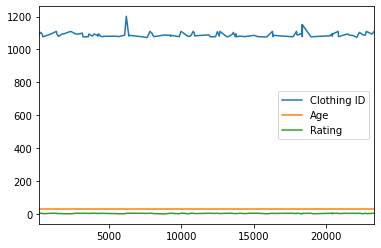

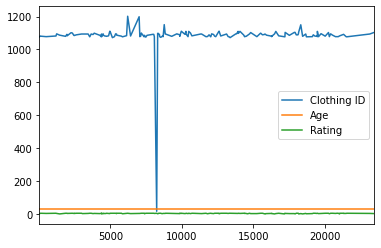

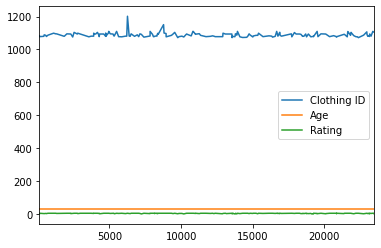

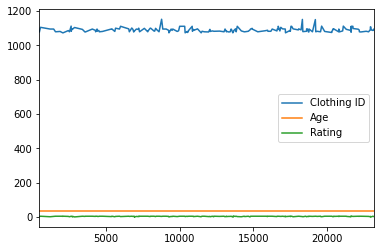

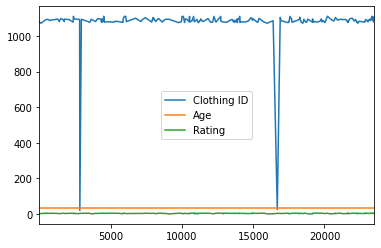

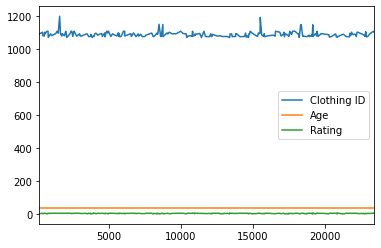

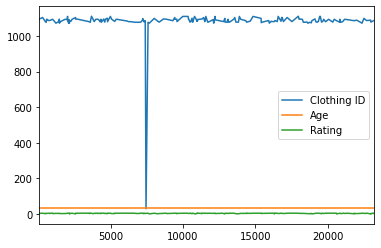

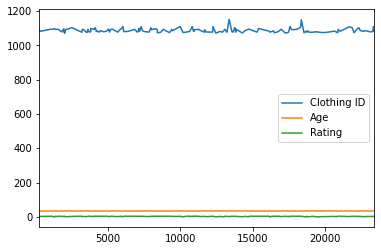

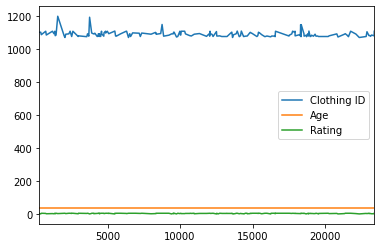

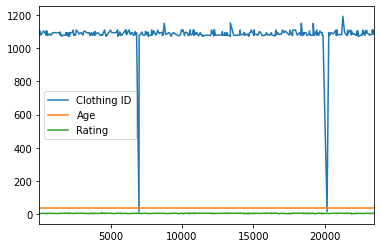

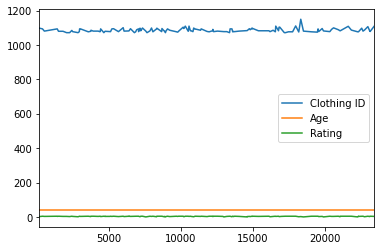

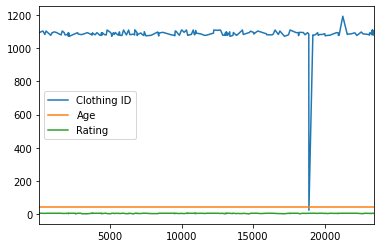

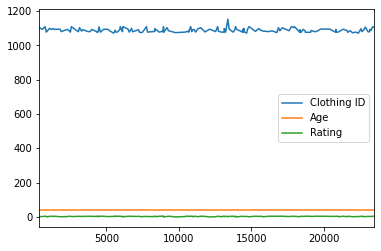

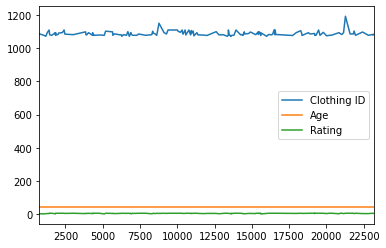

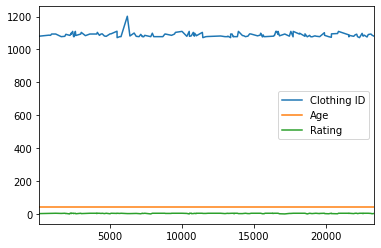

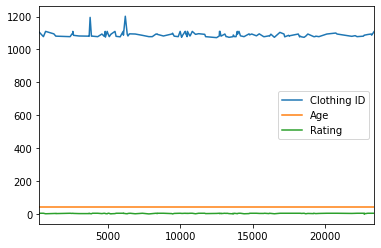

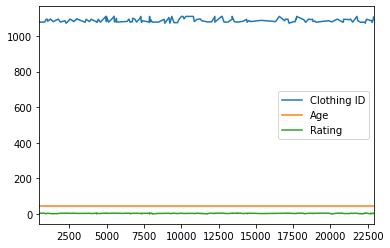

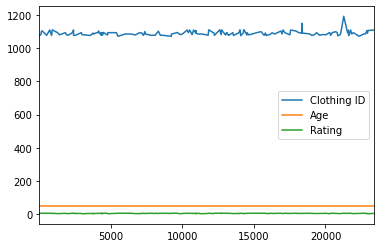

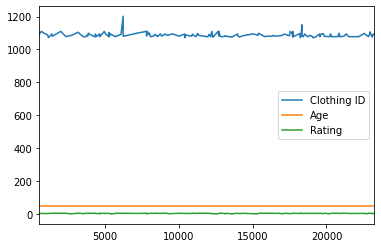

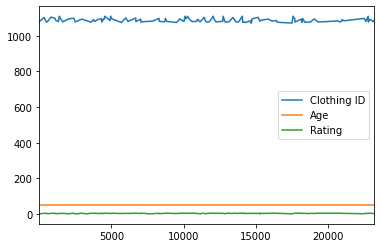

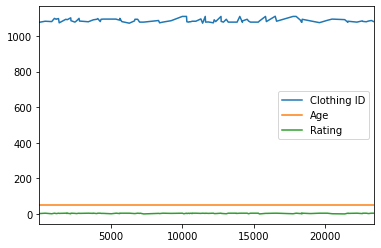

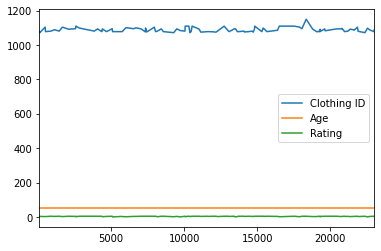

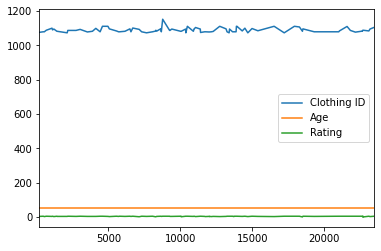

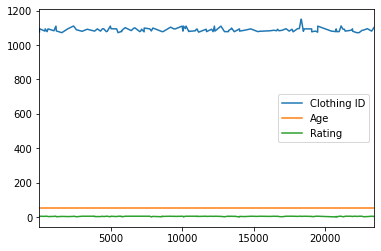

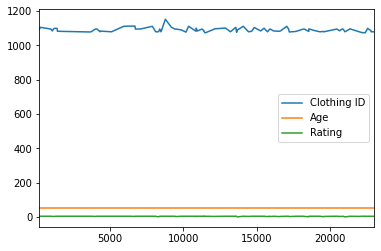

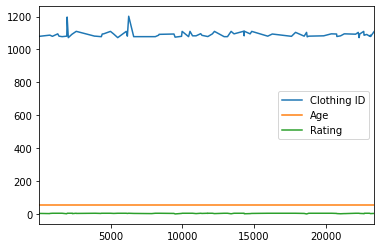

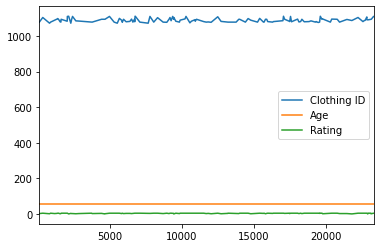

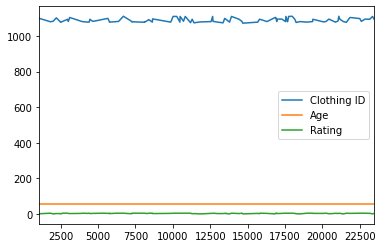

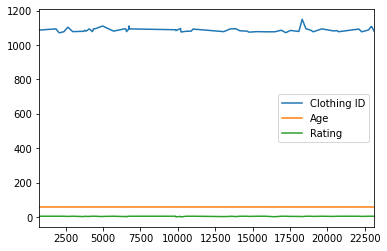

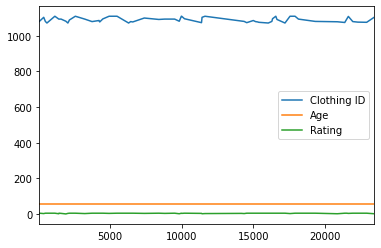

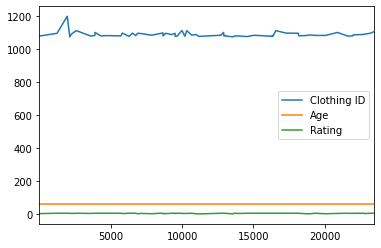

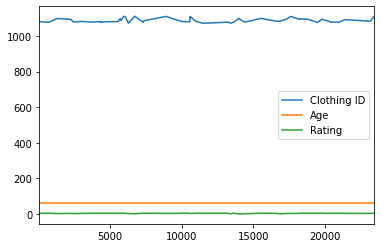

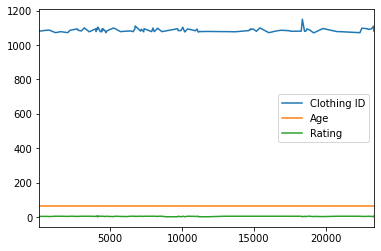

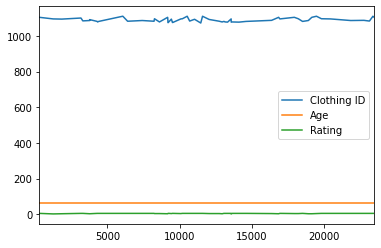

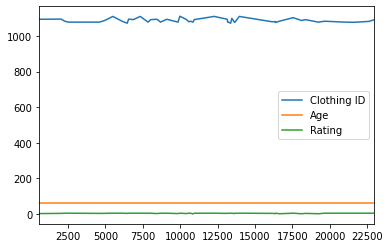

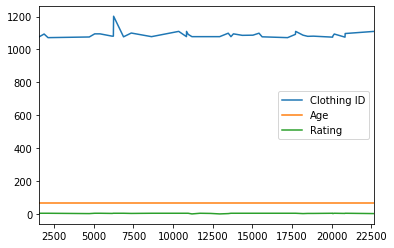

In [161]:
df_dresspool.groupby(['Age']).plot() ###....

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002538C83F5C0>,
      dtype=object)

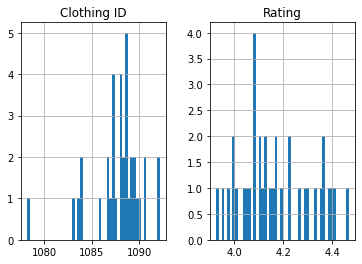

In [163]:
df_dresspool.groupby(['Age']).mean().hist(bins=50)

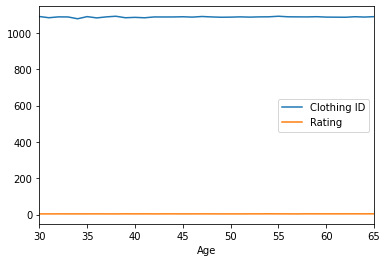

In [164]:
df_dresspool.groupby(['Age']).mean().plot()

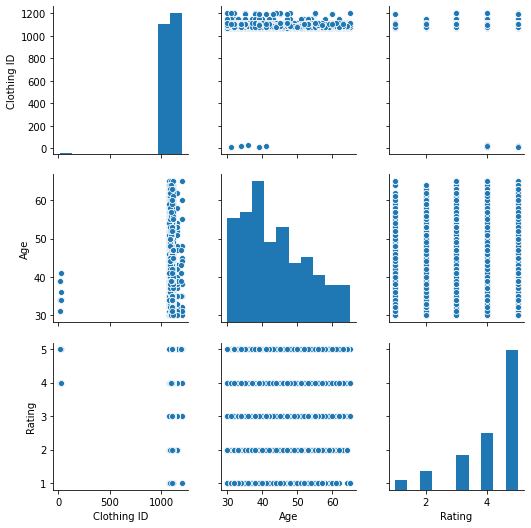

In [165]:
sns.pairplot(df_dresspool)

In [ ]:
##---------------------------------------

In [ ]:
##---------------------------------------

In [15]:
#use of the null reviews. if the reviews are greater than 3 we divide ; 0-3, 4-5
#0-3 shows what they would have preferred
df_03 = df_dresspool.loc[(df_dresspool['Rating'] <= 3 ) & (df_dresspool['Review Text'].isnull().any())]
#
df_03.head()

#print('null total :: >',df_03.isnull().sum())
#null total :: > Clothing ID         0
#Age                 0
#Review Text        16
#Rating              0
#Division Name       0
#Department Name     0
#Class Name          0
#dtype: int64

,Clothing ID,Age,Review Text,Rating,Division Name,Department Name,Class Name
2,1077,60,I had such high hopes for this dress and reall...,3,General,Dresses,Dresses
5,1080,49,"I love tracy reese dresses, but this one is no...",2,General,Dresses,Dresses
10,1077,53,Dress runs small esp where the zipper area run...,3,General,Dresses,Dresses
14,1077,50,This is a nice choice for holiday gatherings. ...,3,General,Dresses,Dresses
22,1077,31,"First of all, this is not pullover styling. th...",2,General,Dresses,Dresses


In [166]:
#use of the null reviews. if the reviews are greater than 3 
#we divide ; 0-3, 4-5
#4-5 shows what they they like

df_45 = df_dresspool.loc[(df_dresspool['Rating'] >= 4 ) & (df_dresspool['Review Text'].isnull().any())]

df_45.head()

#print('null total :: >',df_45.isnull().sum())
#null total :: > Clothing ID          0
#Age                  0
#Review Text        158
#Rating               0
#Division Name        0
#Department Name      0
#Class Name           0
#dtype: int64

,Clothing ID,Age,Review Text,Rating,Division Name,Department Name,Class Name
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,Dresses
9,1077,34,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,General,Dresses,Dresses
11,1095,39,This dress is perfection! so pretty and flatte...,5,General Petite,Dresses,Dresses
12,1095,53,More and more i find myself reliant on the rev...,5,General Petite,Dresses,Dresses
19,1077,47,I love the look and feel of this tulle dress. ...,5,General,Dresses,Dresses


In [144]:
##---------------------------------------

In [145]:
##---------------------------------------

In [146]:
#kienyeji
#create a list of possible fabrics and compare them to the review column
#include *-like, *+like fabric 
#ignore casing 

#fabrics = ['cotton','silk','silky','linen','wool','leather','georgette','chiffon','nylon','polyester','velvet','denim','rayon','viscose','satin','crepe','lycra','net','lace']
#df_dresspool['Fabric Mentioned'] = np.where((df_dresspool['Review Text'].isin(fabrics)), 1, 0) #1 = fabric mentioned, 0 = no fabric mentioned
#df_dresspool.head()

##----------------
#cd = df_dresspool['Fabric Mentioned'] == 0
#cd2 = df_dresspool['Fabric Mentioned'] == 1

#print('0 :', cd.sum())
#print('1 :', cd2.sum())

#------------------
#df_dresspool['Review Search'] = df_dresspool['Review Text'].str.lower().str.split()
#df_dresspool['Present'] = df_dresspool.apply(search_function, axis=1)

#def search_function(row):
#    matches = [test_value in fabrics for test_value in row['Review Search']]
    
#    if any(matches):
#        return 'Yes'
#    else:
#        return 'No'
    
#df_dresspool.head()

In [167]:
cid = df_45.loc[df_45['Clothing ID'] < 200]
cid.count()

Clothing ID        7
Age                7
Review Text        7
Rating             7
Division Name      7
Department Name    7
Class Name         7
dtype: int64

In [168]:
cid2 = df_45.loc[(df_45['Rating'] >= 4) & (df_45['Age'] > 25)]
cid2.count()


Clothing ID        3923
Age                3923
Review Text        3782
Rating             3923
Division Name      3923
Department Name    3923
Class Name         3923
dtype: int64

#CHECK 4-5


In [169]:
df_45['Review Text'] = df_45['Review Text'].map(str)
df_45.dtypes

Clothing ID         int64
Age                 int64
Review Text        object
Rating              int64
Division Name      object
Department Name    object
Class Name         object
dtype: object

In [171]:
#word expansion using a disctionary key:value pairs
contractions = contractions = {
    "ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}
#string check and replacement of word using the key va;ue pair
def cont_to_exp(x):
    if type(x) is str:
        x = x.replace('\\', '')
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [151]:
#feature calculation 

In [172]:
df_45['Review Text']

1        Love this dress!  it's sooo pretty.  i happene...
9        I'm 5"5' and 125 lbs. i ordered the s petite t...
11       This dress is perfection! so pretty and flatte...
12       More and more i find myself reliant on the rev...
19       I love the look and feel of this tulle dress. ...
21       I'm upset because for the price of the dress, ...
58       I got this in the petite length, size o, and i...
60       This dress is simply beautiful and stunning. i...
74       I passed up this dress so many times in the st...
76       I would have loved this dress if the bust and ...
79       This dress is adorable - it's a perfect casual...
87       I debated n that as i think it looks loose on ...
90       I love cute summer dresses and this one, espec...
93                                                     nan
109          Perfect dress for hot, humid, sticky weather.
113      This dress is comfortable and stylish at the s...
116      Prior reviewer nailed it with the summary of t.

In [173]:
df_45['Polarity'] = df_45['Review Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [174]:
df_45['Review Length'] =  df_45['Review Text'].apply(lambda x: len(x))

In [175]:
df_45['Word Count'] = df_45['Review Text'].apply(lambda x: len(x.split()))

In [176]:
#average length of words per row
def get_avg_length(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
    return word_len/len(words)

df_45['Avg Review Len'] = df_45['Review Text'].apply(lambda x: get_avg_length(x))

df_45.head()

,Clothing ID,Age,Review Text,Rating,Division Name,Department Name,Class Name,Polarity,Review Length,Word Count,Avg Review Len
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,Dresses,0.339583,303,62,3.822581
9,1077,34,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,General,Dresses,Dresses,0.204200,360,72,4.013889
11,1095,39,This dress is perfection! so pretty and flatte...,5,General Petite,Dresses,Dresses,0.250000,51,8,5.500000
12,1095,53,More and more i find myself reliant on the rev...,5,General Petite,Dresses,Dresses,0.244156,502,91,4.527473
19,1077,47,I love the look and feel of this tulle dress. ...,5,General,Dresses,Dresses,0.431818,292,57,4.140351


In [180]:
df_45.describe()

,Clothing ID,Age,Rating,Polarity,Review Length,Word Count,Avg Review Len
count,3923.000000,3923.000000,3923.000000,3923.000000,3923.000000,3923.000000,3923.000000
mean,1086.836095,43.732093,4.710171,0.273913,317.223553,61.999745,4.150928
std,47.080875,9.216024,0.453741,0.175461,155.533705,30.892375,0.459001
min,13.000000,30.000000,4.000000,-0.300000,3.000000,1.000000,3.000000
25%,1078.000000,36.000000,4.000000,0.159461,193.000000,37.000000,3.911765
50%,1085.000000,42.000000,5.000000,0.255556,325.000000,63.000000,4.116279
75%,1094.000000,50.000000,5.000000,0.373194,495.000000,92.000000,4.355598
max,1202.000000,65.000000,5.000000,1.000000,507.000000,115.000000,8.500000


#Polarity distribution

In [179]:
df_45['Polarity'].iplot(kind='hist', colors='blue', bins=50, xTitle='Polarity', yTitle='Count', title='Sentiment Polarity' )

In [186]:
#Age & Rating review
df_45['Age'].iplot(kind='hist',  xTitle='Age', yTitle='Count', title='Age Distribution', colors='blue', linecolor='white')

In [191]:
df_45['Rating'].iplot(kind='hist', xTitle='Rating', yTitle='Count', title='Rating Distribution', colors='blue', linecolor='white')

In [190]:
#General col check
df_45['Division Name'].value_counts().iplot(kind='bar', xTitle='Clothing Division', yTitle='Count', title='Division dispay')

#n-gram analysis - word analysis
unigram, bigram, trigram

In [198]:
def get_top_n_words(x,n):
    vector = CountVectorizer().fit(x)
    transformed = vector.transform(x)
    sum_of_words = transformed.sum(axiz=0)
    words_frequency = [(words, sum_of_words[0,indexed]) for words, indexed in vector.vocabulary_.items()]
    words_frequency = sorted(words_frequency, key = lambda x : x[1], reverse = True)
    return words_frequency[:n]

In [221]:
#unigram 
def get_top_n_words(x,n):
    vector = CountVectorizer(ngram_range=(1,1), stop_words='english').fit(x) #includes 5Ws, is, is, are...
    transformed = vector.transform(x)
    sum_of_words = transformed.sum(axis=0)
    words_frequency = [(words, sum_of_words[0,indexed]) for words, indexed in vector.vocabulary_.items()]
    words_frequency = sorted(words_frequency, key = lambda x : x[1], reverse = True)
    return words_frequency[:n]

dfreview_frequenct = get_top_n_words(df_45['Review Text'],20)
dfreview_frequenct200 = get_top_n_words(df_45['Review Text'],200) #400 was preference

dfreview_frequenct



[('dress', 5681),
 ('size', 1687),
 ('love', 1579),
 ('fit', 1286),
 ('wear', 1238),
 ('like', 1061),
 ('great', 1003),
 ('just', 933),
 ('fabric', 880),
 ('flattering', 838),
 ('perfect', 818),
 ('small', 743),
 ('comfortable', 686),
 ('little', 682),
 ('beautiful', 677),
 ('fits', 676),
 ('petite', 657),
 ('color', 653),
 ('ordered', 613),
 ('really', 589)]

In [239]:
#to txt file
dfreview_frequenct_op = np.array(dfreview_frequenct200, dtype=np.str)
with open('200_Words_Uni.txt', 'w') as filehandle:
    
    for item in dfreview_frequenct_op:
        filehandle.write('%s\n' % item)


In [222]:
with open('200_Words.data','wb') as filehandle:
    pickle.dump(dfreview_frequenct200, filehandle)

In [237]:
#unigram visualizaton
df_uni = pd.DataFrame(dfreview_frequenct, columns=['Unigram','Frequency'])
df_uni = df_uni.set_index('Unigram')
df_uni.iplot(kind='bar',xTitle='Unigram',yTitle='Count',title='Top 20 Words',color='blue')

In [241]:
#trigram
def get_top_n_words(x,n):
    vector = CountVectorizer(ngram_range=(3,3), stop_words='english').fit(x) #will exclude them in this 5Ws, is, is, are...
    transformed = vector.transform(x)
    sum_of_words = transformed.sum(axis=0)
    words_frequency = [(words, sum_of_words[0,indexed]) for words, indexed in vector.vocabulary_.items()]
    words_frequency = sorted(words_frequency, key = lambda x : x[1], reverse = True)
    return words_frequency[:n]

dfreview_frequenc_tri = get_top_n_words(df_45['Review Text'],20)
dfreview_frequenct_tri80 = get_top_n_words(df_45['Review Text'],80)

dfreview_frequenc_tri

[('fits true size', 55),
 ('love love love', 36),
 ('usually wear size', 32),
 ('absolutely love dress', 32),
 ('runs true size', 31),
 ('fits like glove', 30),
 ('fit true size', 29),
 ('love love dress', 22),
 ('dress runs large', 22),
 ('dress true size', 21),
 ('does run large', 21),
 ('size fit perfectly', 19),
 ('fell love dress', 19),
 ('fits like dream', 19),
 ('love dress comfortable', 18),
 ('small fits perfectly', 18),
 ('really like dress', 18),
 ('dress fit perfectly', 17),
 ('dress does run', 17),
 ('perfect summer dress', 16)]

In [238]:

df_tri = pd.DataFrame(dfreview_frequenc_tri, columns = ['Trigram', 'Frequency'])
df_tri = df_tri.set_index('Trigram')
df_tri.iplot(kind = 'bar' , xTitle = 'Trigram' , yTitle = 'Count', title = 'Top 20 Words',color = 'blue')

In [243]:
#to txt file
dfreview_frequenct_op2 = np.array(dfreview_frequenct_tri80, dtype=np.str)
with open('80_Words_Tri.txt', 'w') as filehandle:
    
    for item in dfreview_frequenct_op2:
        filehandle.write('%s\n' % item)
